In [3]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 1. 1. 0.]
 [0. 1. 0. ... 1. 1. 0.]
 ...
 [0. 1. 1. ... 0. 1. 0.]
 [0. 1. 1. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(226, 226)


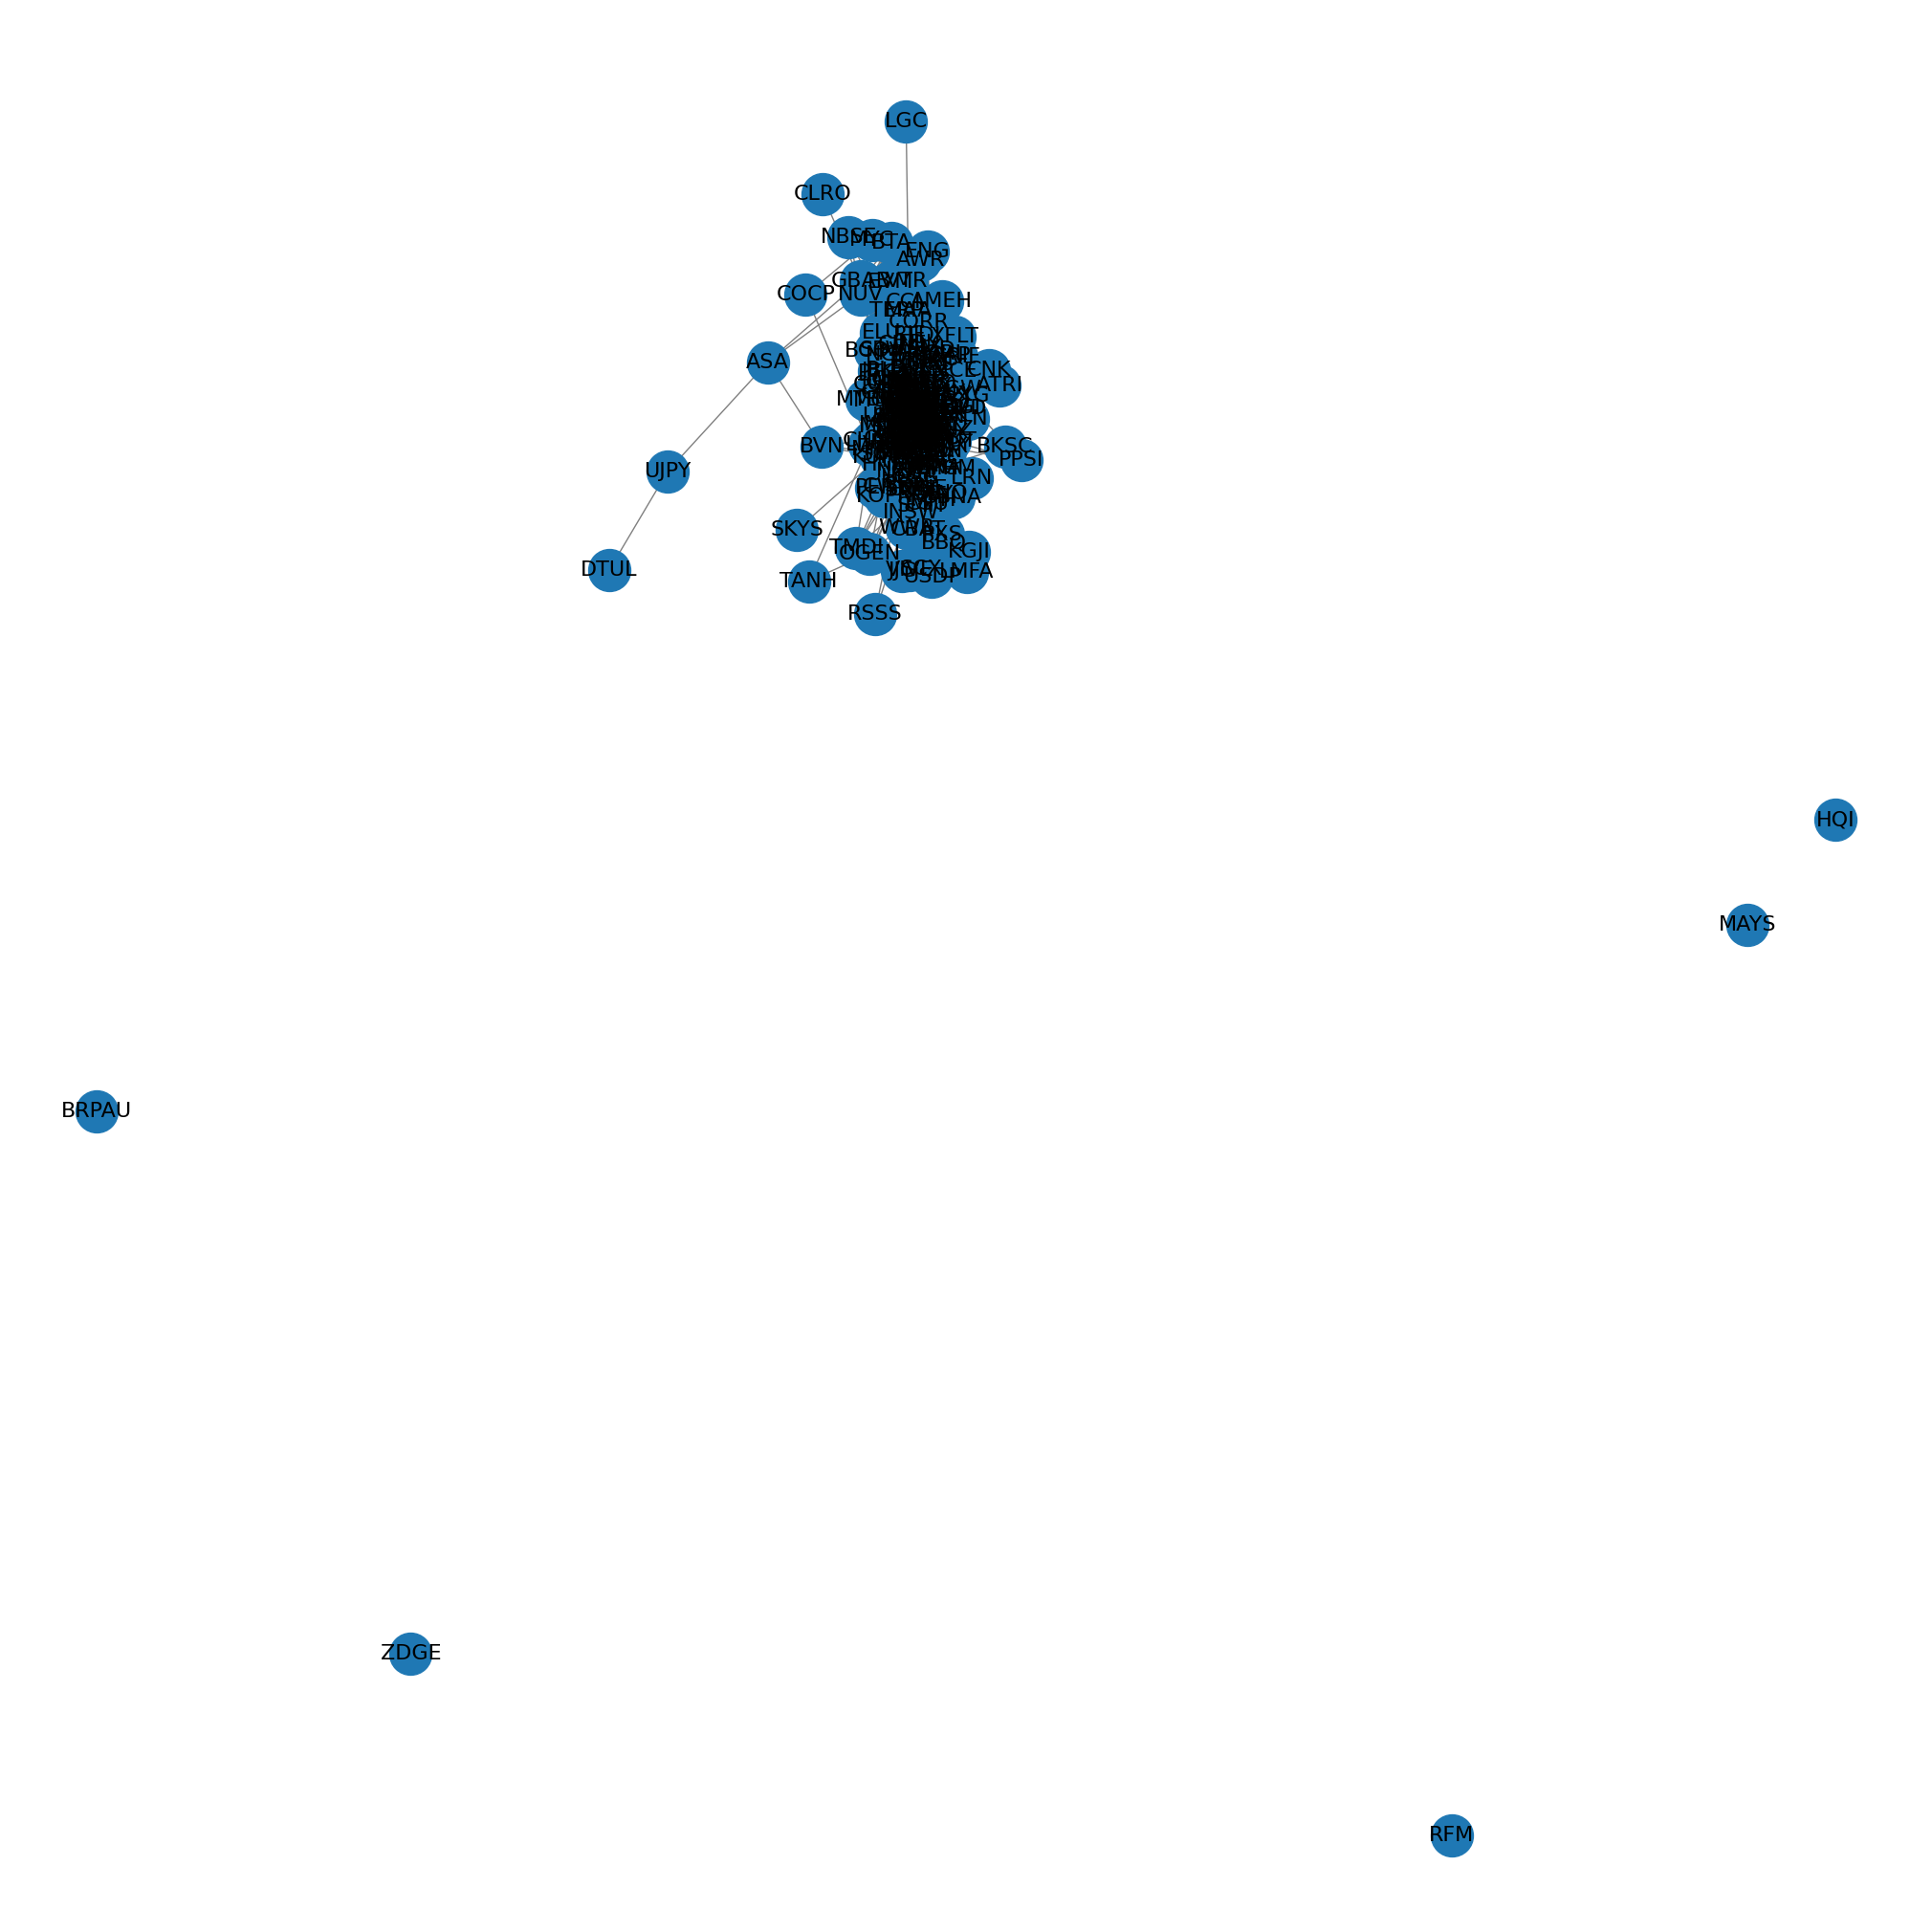

In [4]:
A = np.load("stock_item_adj_matrix_small.npy")
open_prices = dict(np.load("stock_item_map_small.npz", allow_pickle=True))

print(A)
print(A.shape)

G = nx.from_numpy_array(A)

plt.figure(figsize=(20,20))
key_enum = list(enumerate(open_prices))

labels = {i: key_enum[i][1] for i in range(len(open_prices))}
pos = nx.spectral_layout(G)
nx.draw(G, labels=labels, with_labels=True, edge_color='gray', node_size=1000, font_size=16)
plt.savefig("market_graph.png")

mean degree 56.256637168141594


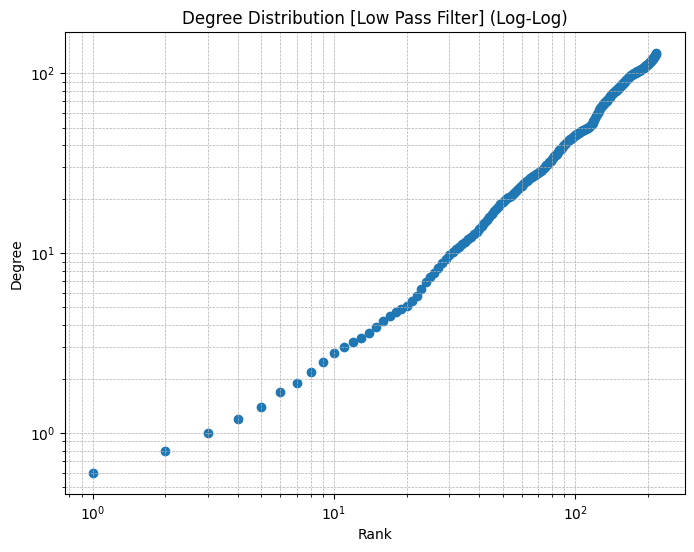

In [5]:
# lets look at the mean degree and do some analysis with the degree distribution

ks = []
for i in A:
    k = np.sum(i)
    ks.append(k)

ks = np.sort(ks)

mean_k = np.mean(ks)
print(f"mean degree {mean_k}")

import matplotlib.pyplot as plt
import numpy as np

# Already sorted: ks
window_size = 10  # You can tune this value

# apply a low pass filter
smoothed_ks = np.convolve(ks, np.ones(window_size)/window_size, mode='valid')

ranks = np.arange(1, len(smoothed_ks)+1)
plt.figure(figsize=(8,6))
plt.scatter(ranks, smoothed_ks)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Rank')
plt.ylabel('Degree')
plt.title('Degree Distribution [Low Pass Filter] (Log-Log)')
plt.grid(True, which="both", ls="--", lw=0.5)
plt.show()


Lets take a look at the entropy related to degree distribution. If every node in the network has the same degree then the system is very predictable (low entropy). On the other hand if the degrees are spread out wide then the degree distribution is less predictable (high entropy)

In [32]:
from scipy.stats import entropy

hist, bins = np.histogram(ks, bins=50, density=True)
hist = hist[hist > 0]  # remove zero bins
degree_entropy = entropy(hist)
print(f"Entropy of degree distribution: {degree_entropy:.4f}")


Entropy of degree distribution: 3.7058


Here we observe that the entropy value for degree distribution is more than 3 which is pretty high. This implies that different items are connected to varying numbers of other items. Also that some items are highly central (influential). High entropy implies the existence of market sectors and volatility driven hubs within the market to be discovered. Theres a lot to be revealed

Lets look at the PDF of the degree distribution, whats the probability that a randomly chosen node has degree k

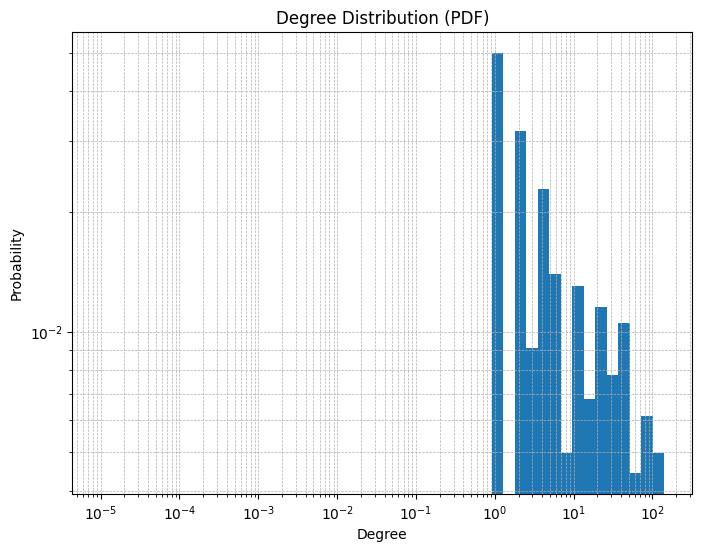

In [33]:
plt.figure(figsize=(8, 6))
plt.hist(ks, bins=np.logspace(np.log10(ks.min()+1e-5), np.log10(ks.max()), 50), density=True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Degree")
plt.ylabel("Probability")
plt.title("Degree Distribution (PDF)")
plt.grid(True, which="both", ls="--", lw=0.5)
plt.show()


Lets also look at the CCDF, whats the probability that a node has a degree greater or equal to k

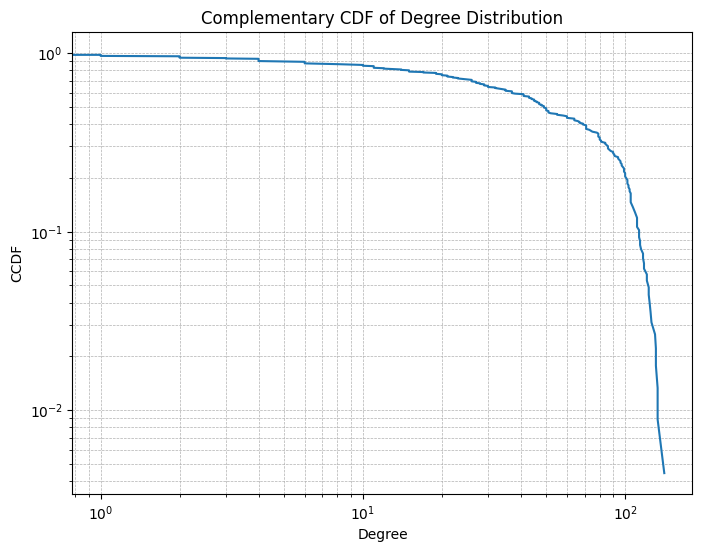

In [34]:
sorted_ks = np.sort(ks)
ccdf = 1.0 - np.arange(len(sorted_ks)) / float(len(sorted_ks))

plt.figure(figsize=(8, 6))
plt.plot(sorted_ks, ccdf)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Degree")
plt.ylabel("CCDF")
plt.title("Complementary CDF of Degree Distribution")
plt.grid(True, which="both", ls="--", lw=0.5)
plt.show()

Lets take a look at some centrality metrics

In [35]:
deg_centrality = nx.degree_centrality(G)
betweenness = nx.betweenness_centrality(G)
closeness = nx.closeness_centrality(G)
eigenvector = nx.eigenvector_centrality(G, max_iter=1000)
pagerank = nx.pagerank(G)

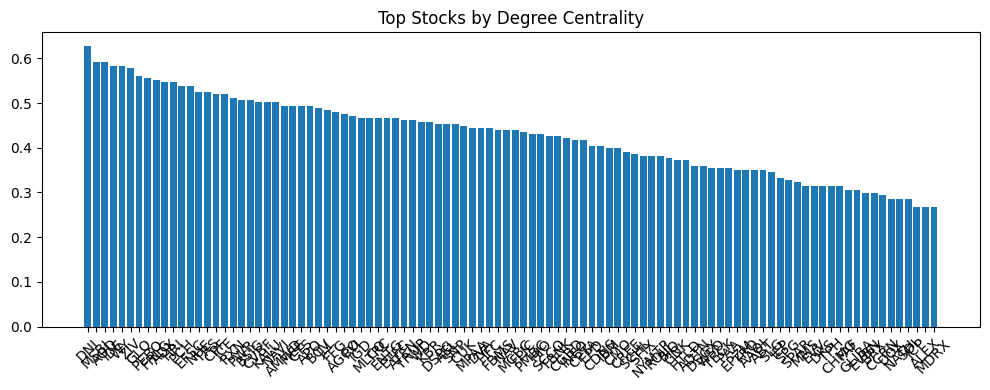

In [36]:
top_k = sorted(deg_centrality.items(), key=lambda x: x[1], reverse=True)[:100]
labels = [f"{key_enum[i][1]}" for i, _ in top_k]
values = [v for _, v in top_k]

plt.figure(figsize=(10, 4))
plt.bar(labels, values)
plt.xticks(rotation=45)
plt.title("Top Stocks by Degree Centrality")
plt.tight_layout()
plt.show()

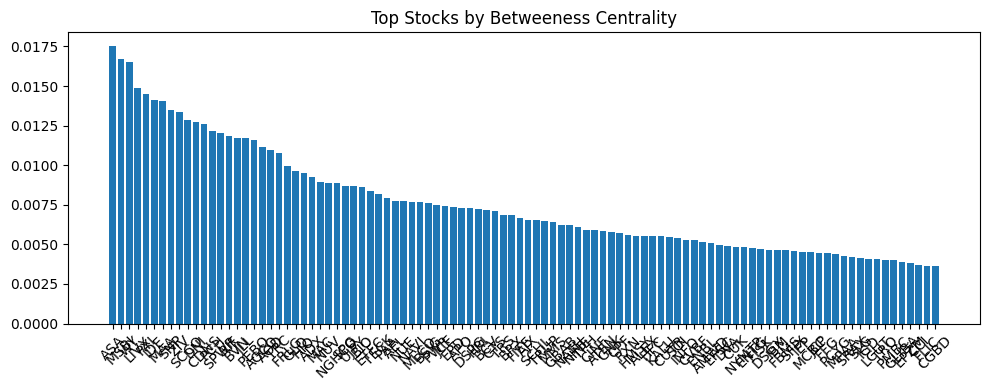

In [37]:
top_k = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:100]
labels = [f"{key_enum[i][1]}" for i, _ in top_k]
values = [v for _, v in top_k]

plt.figure(figsize=(10, 4))
plt.bar(labels, values)
plt.xticks(rotation=45)
plt.title("Top Stocks by Betweeness Centrality")
plt.tight_layout()
plt.show()

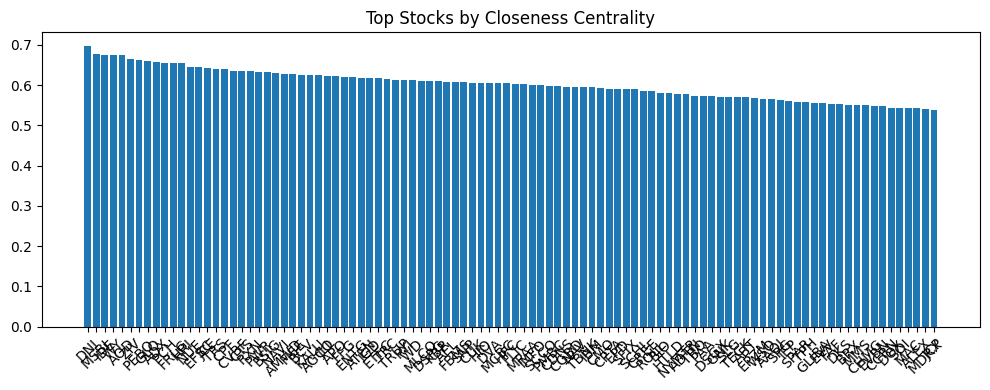

In [38]:
top_k = sorted(closeness.items(), key=lambda x: x[1], reverse=True)[:100]
labels = [f"{key_enum[i][1]}" for i, _ in top_k]
values = [v for _, v in top_k]

plt.figure(figsize=(10, 4))
plt.bar(labels, values)
plt.xticks(rotation=45)
plt.title("Top Stocks by Closeness Centrality")
plt.tight_layout()
plt.show()

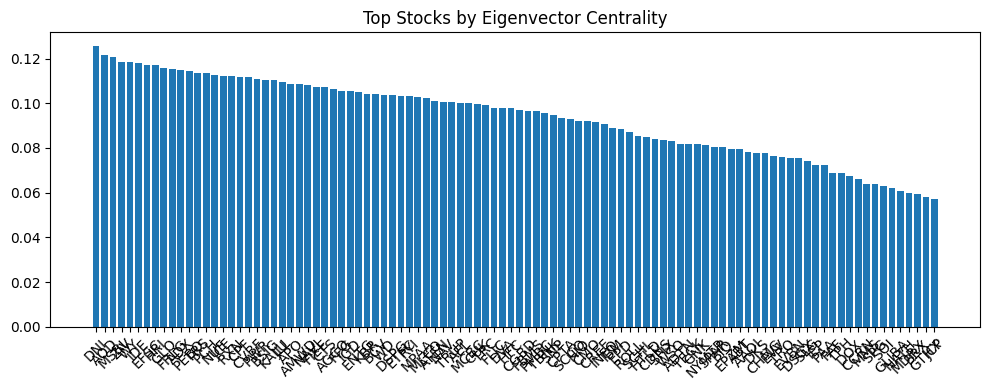

In [39]:
top_k = sorted(eigenvector.items(), key=lambda x: x[1], reverse=True)[:100]
labels = [f"{key_enum[i][1]}" for i, _ in top_k]
values = [v for _, v in top_k]

plt.figure(figsize=(10, 4))
plt.bar(labels, values)
plt.xticks(rotation=45)
plt.title("Top Stocks by Eigenvector Centrality")
plt.tight_layout()
plt.show()

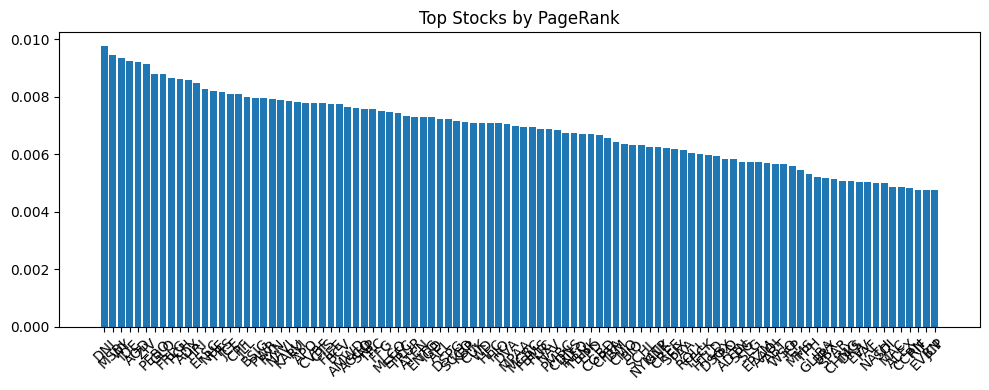

In [40]:
top_k = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:100]
labels = [f"{key_enum[i][1]}" for i, _ in top_k]
values = [v for _, v in top_k]

plt.figure(figsize=(10, 4))
plt.bar(labels, values)
plt.xticks(rotation=45)
plt.title("Top Stocks by PageRank")
plt.tight_layout()
plt.show()

/tmp/ipykernel_324957/38039724.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap("Set1", len(unique_labels))


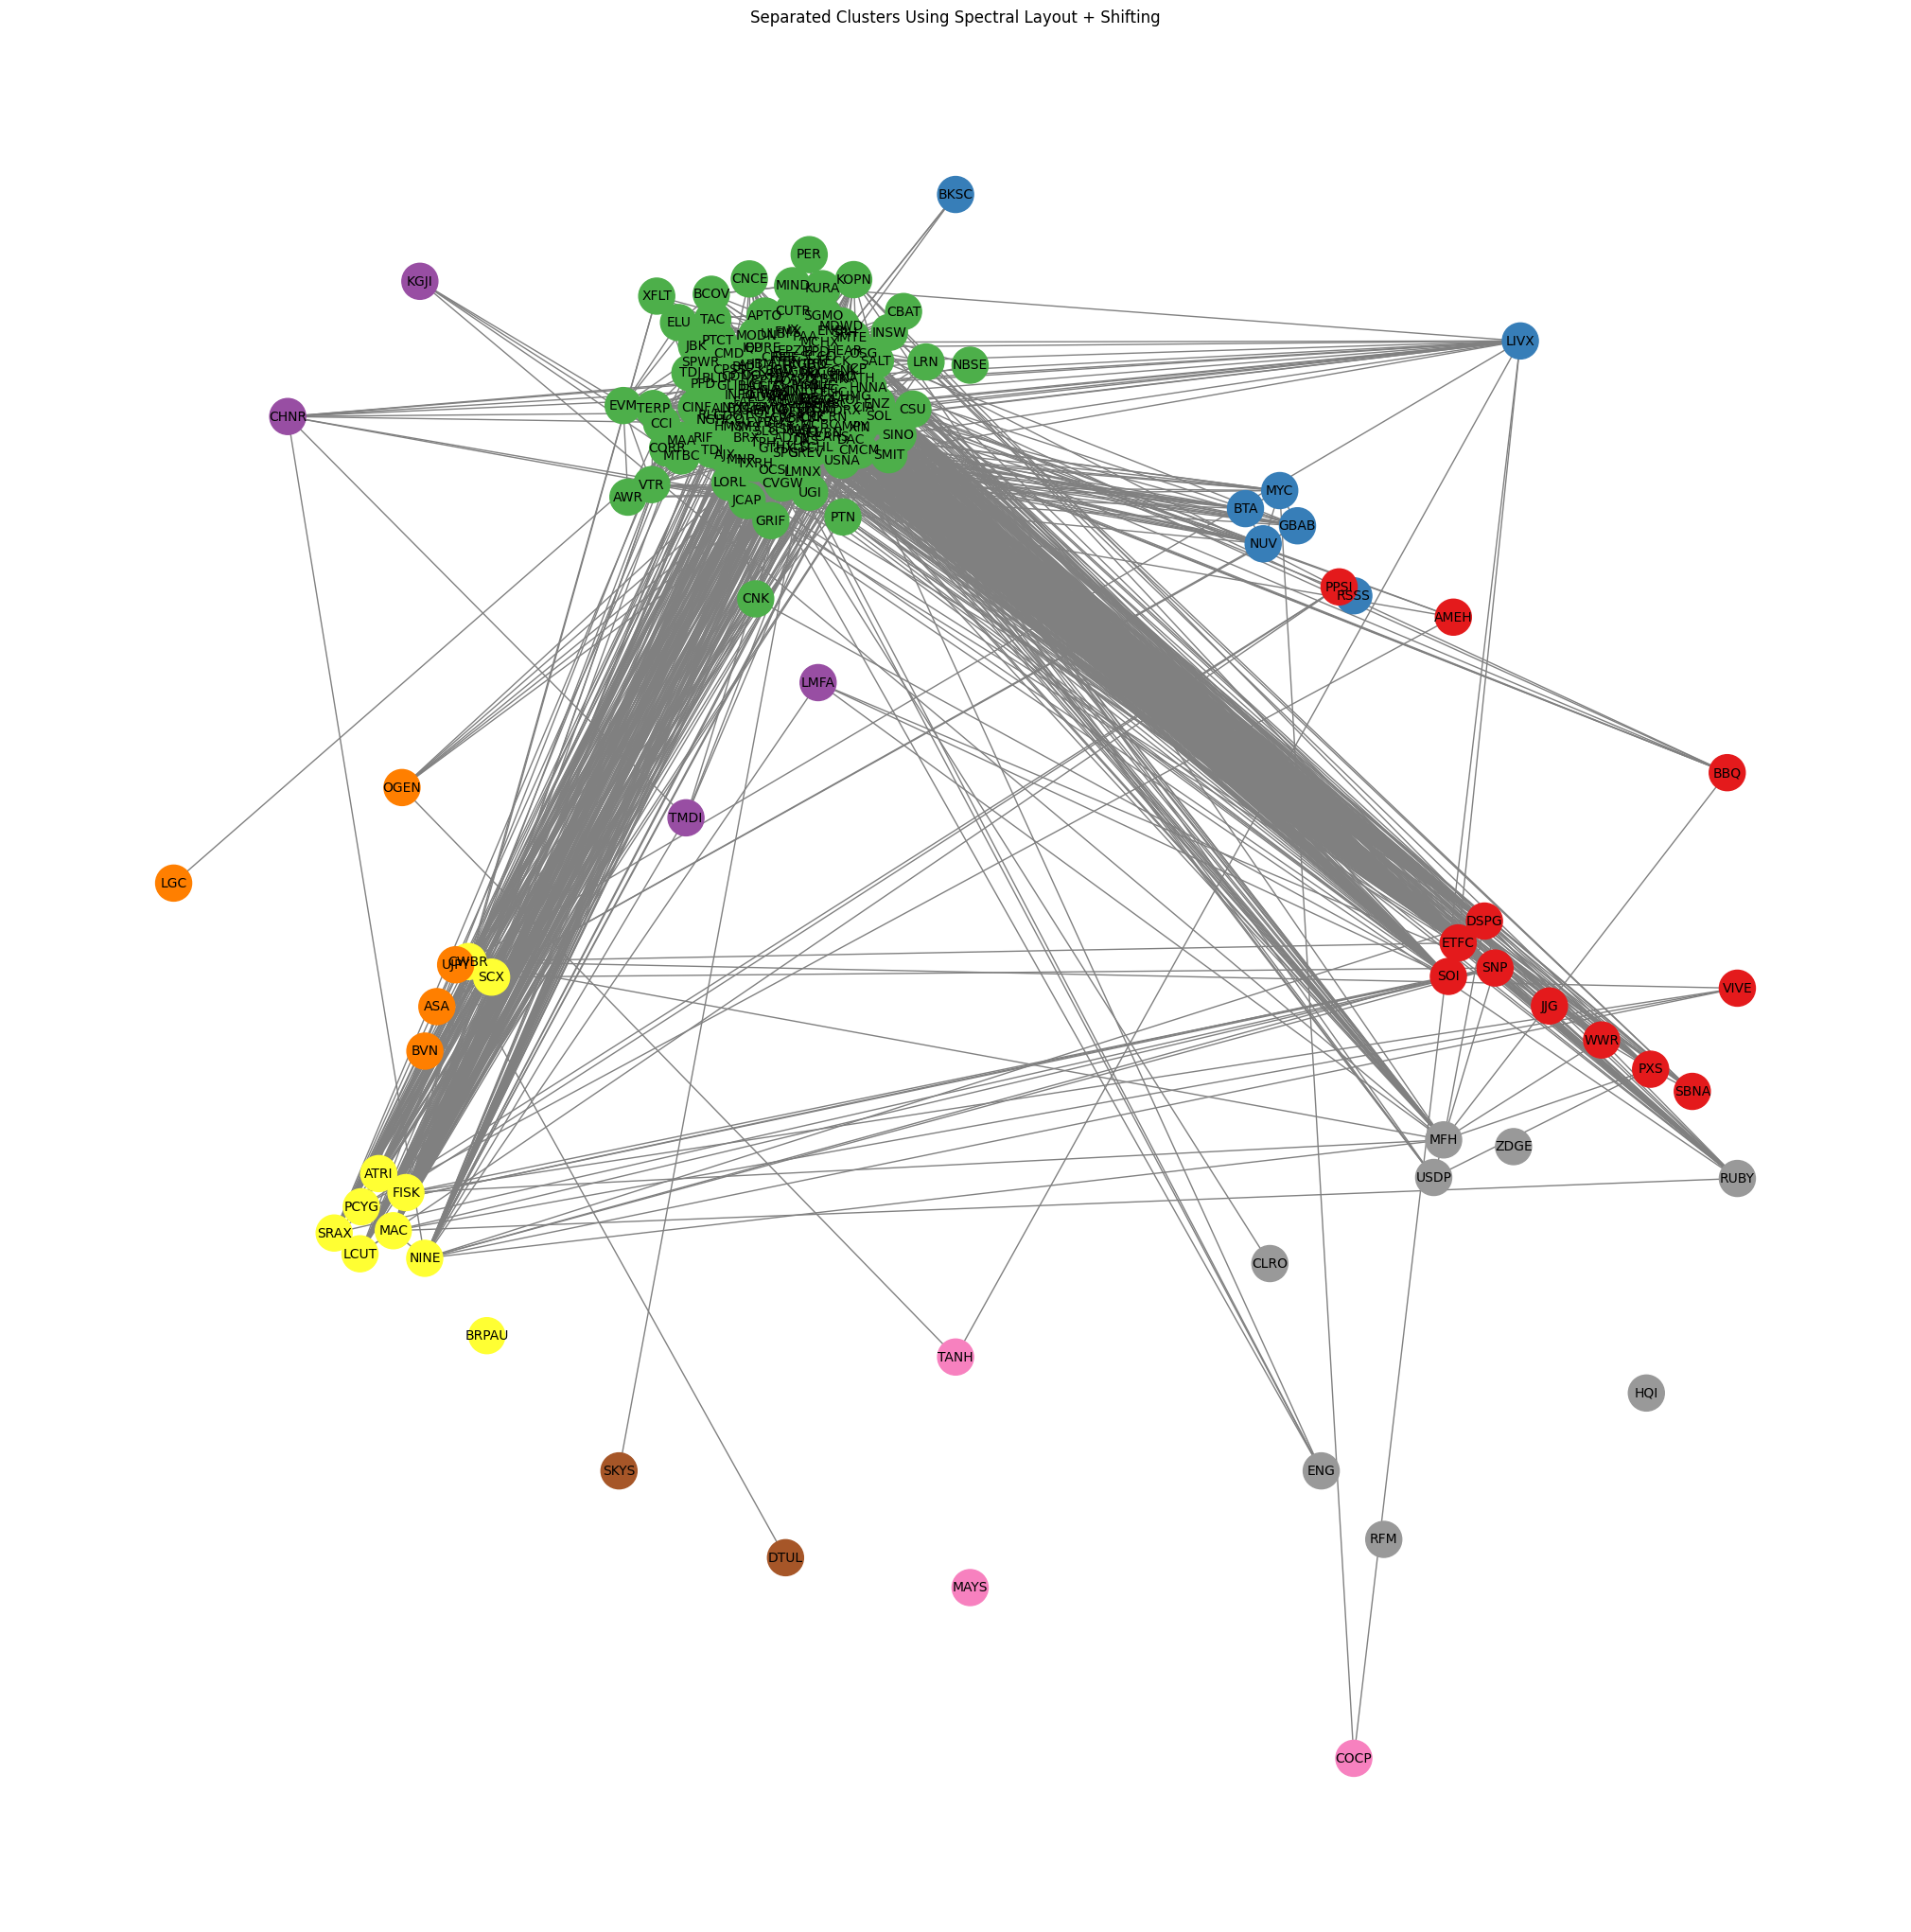

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Assume A, key_enum, and open_prices are already defined

# Step 1: Spectral clustering
ks = np.sum(A, axis=1)
D = np.diag(ks)
L = D - A
_, U = np.linalg.eigh(L)

def kmeans(X, k, max_iters=1000, tol=1e-5):
    np.random.seed(42)
    centroids = X[np.random.choice(len(X), k, replace=False)]

    for _ in range(max_iters):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        if np.linalg.norm(new_centroids - centroids) < tol:
            break
        centroids = new_centroids
    return labels

K = 20  # Try fewer clusters for better visual spacing
labels = kmeans(U[:, 1:K+1], K)
unique_labels = np.unique(labels)

# Step 2: Build graph and assign color
G = nx.from_numpy_array(A)
color_map = plt.cm.get_cmap("Set1", len(unique_labels))
node_colors = [color_map(label) for label in labels]

# Step 3: Layout clusters independently and shift them
cluster_nodes = {k: [] for k in unique_labels}
for i, label in enumerate(labels):
    cluster_nodes[label].append(i)

cluster_pos = {}
offset_radius = 3
angle_step = 2 * np.pi / K

for idx, k in enumerate(unique_labels):
    nodes = cluster_nodes[k]
    subgraph = G.subgraph(nodes)
    
    # Layout just this cluster
    local_pos = nx.spring_layout(subgraph, seed=42)
    
    # Offset to cluster's position on circle
    angle = idx * angle_step
    offset = np.array([offset_radius * np.cos(angle), offset_radius * np.sin(angle)])
    for node, pos in local_pos.items():
        cluster_pos[node] = pos + offset

# Step 4: Draw
plt.figure(figsize=(20, 20))
node_labels = {i: key_enum[i][1] for i in range(len(open_prices))}
nx.draw(G, pos=cluster_pos, labels=node_labels, with_labels=True,
        node_color=node_colors, edge_color='gray', node_size=750, font_size=10)
plt.title("Separated Clusters Using Spectral Layout + Shifting")
plt.axis('off')
plt.show()


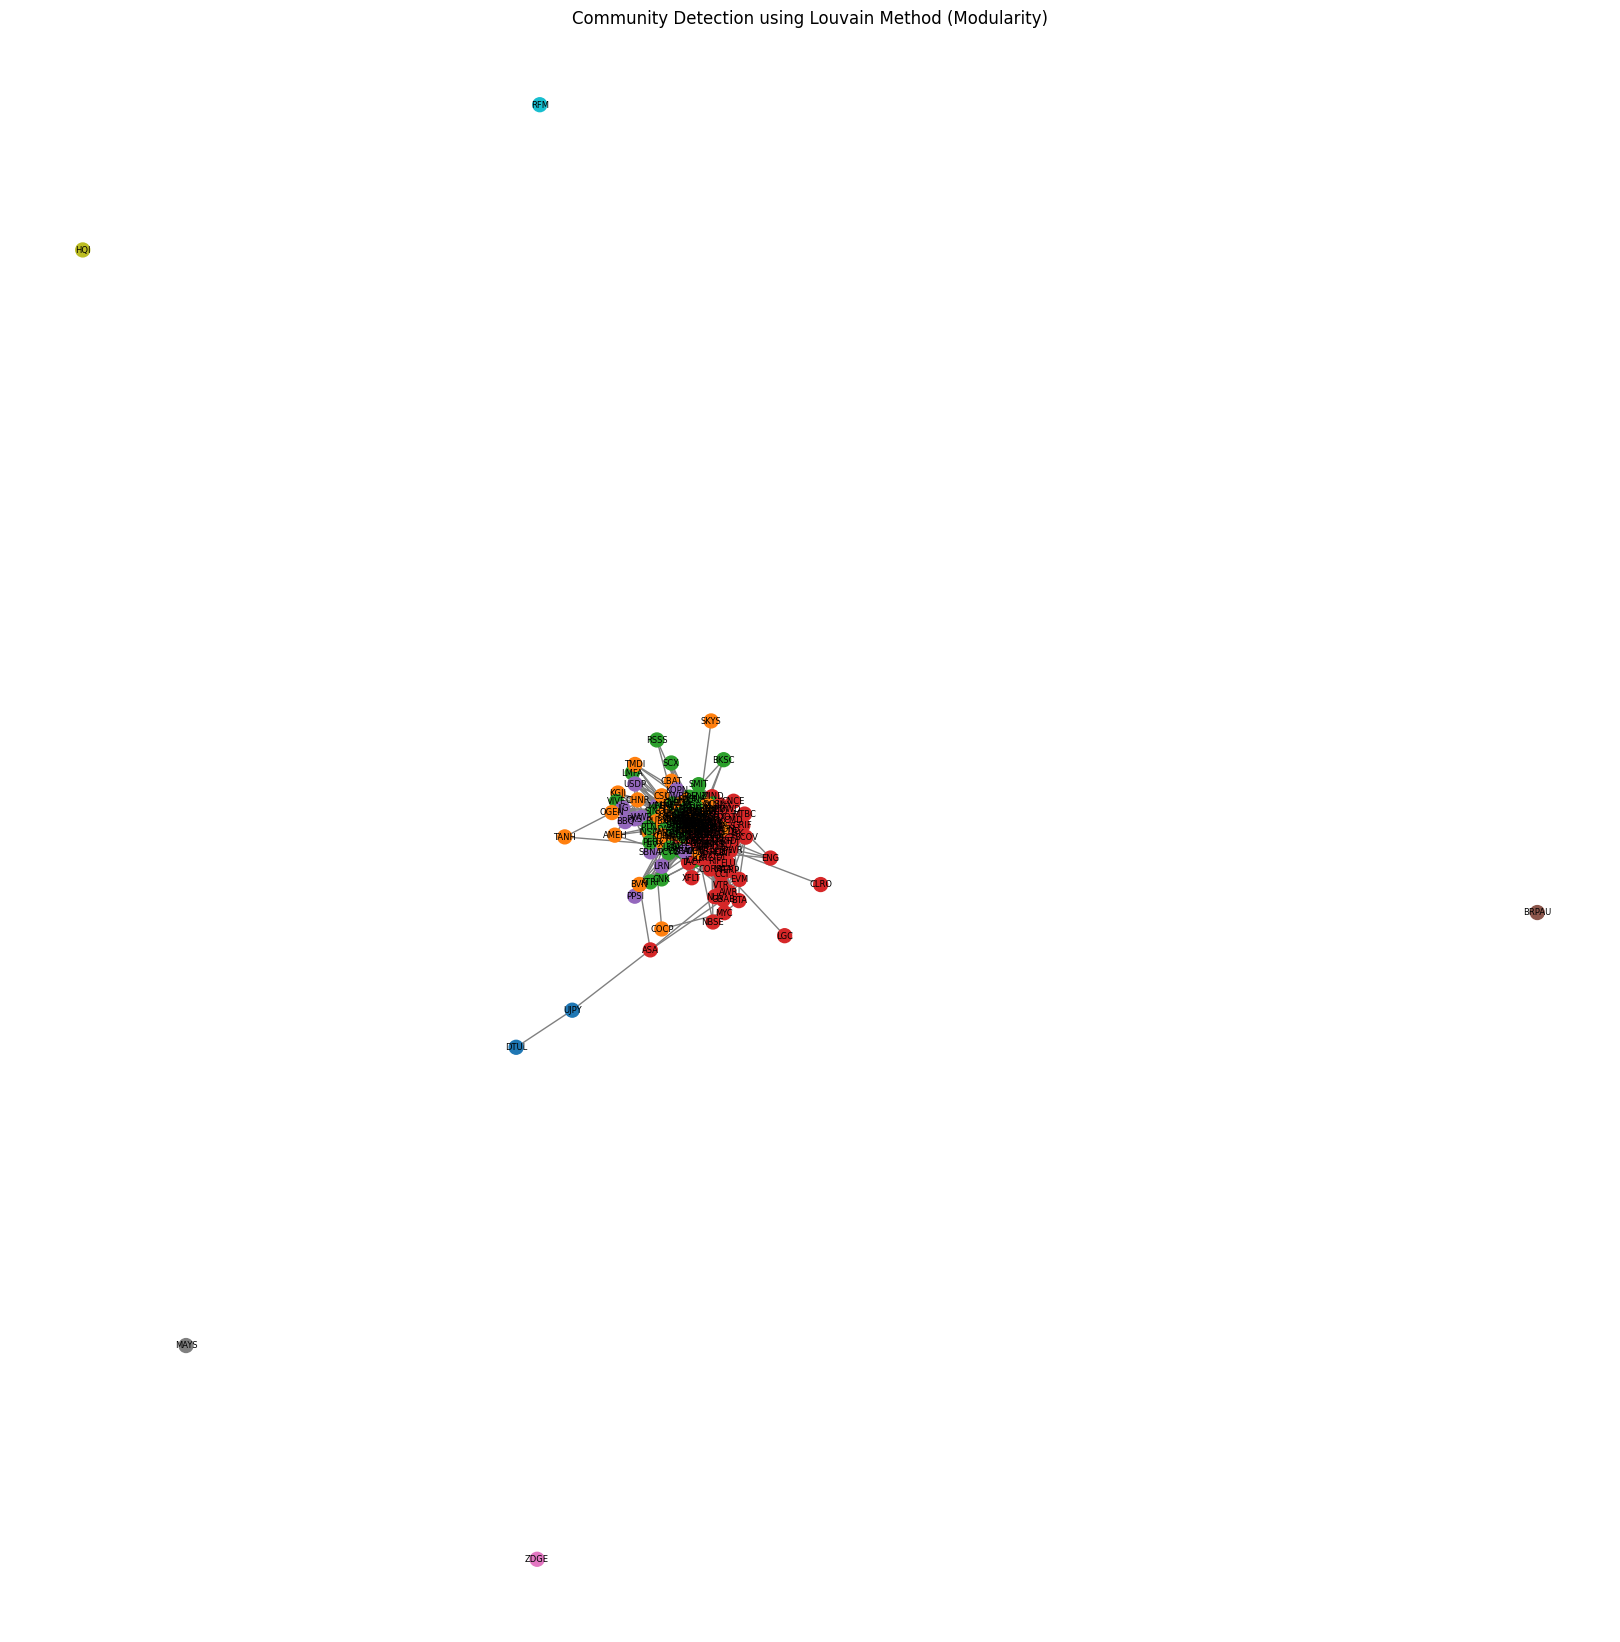

Modularity: 0.127


In [74]:
import community as community_louvain

G = nx.from_numpy_array(A)

partition = community_louvain.best_partition(G)

unique_communities = set(partition.values())
color_map = {node: partition[node] for node in G.nodes()}

colors = [color_map[node] for node in G.nodes()]
pos = nx.spring_layout(G) 

plt.figure(figsize=(16, 16))
nx.draw(G, pos, labels=labels, node_color=colors, with_labels=False, node_size=100, font_size=6, edge_color='gray', cmap=plt.cm.tab10)
plt.title("Community Detection using Louvain Method (Modularity)")
plt.show()

communities = [set() for _ in range(max(partition.values()) + 1)]
for node, comm in partition.items():
    communities[comm].add(node)

mod_score = community_louvain.modularity(partition, G)
print(f"Modularity: {mod_score:.3f}")


Lets calculate the minimum spanning tree to identify the underlying market structure

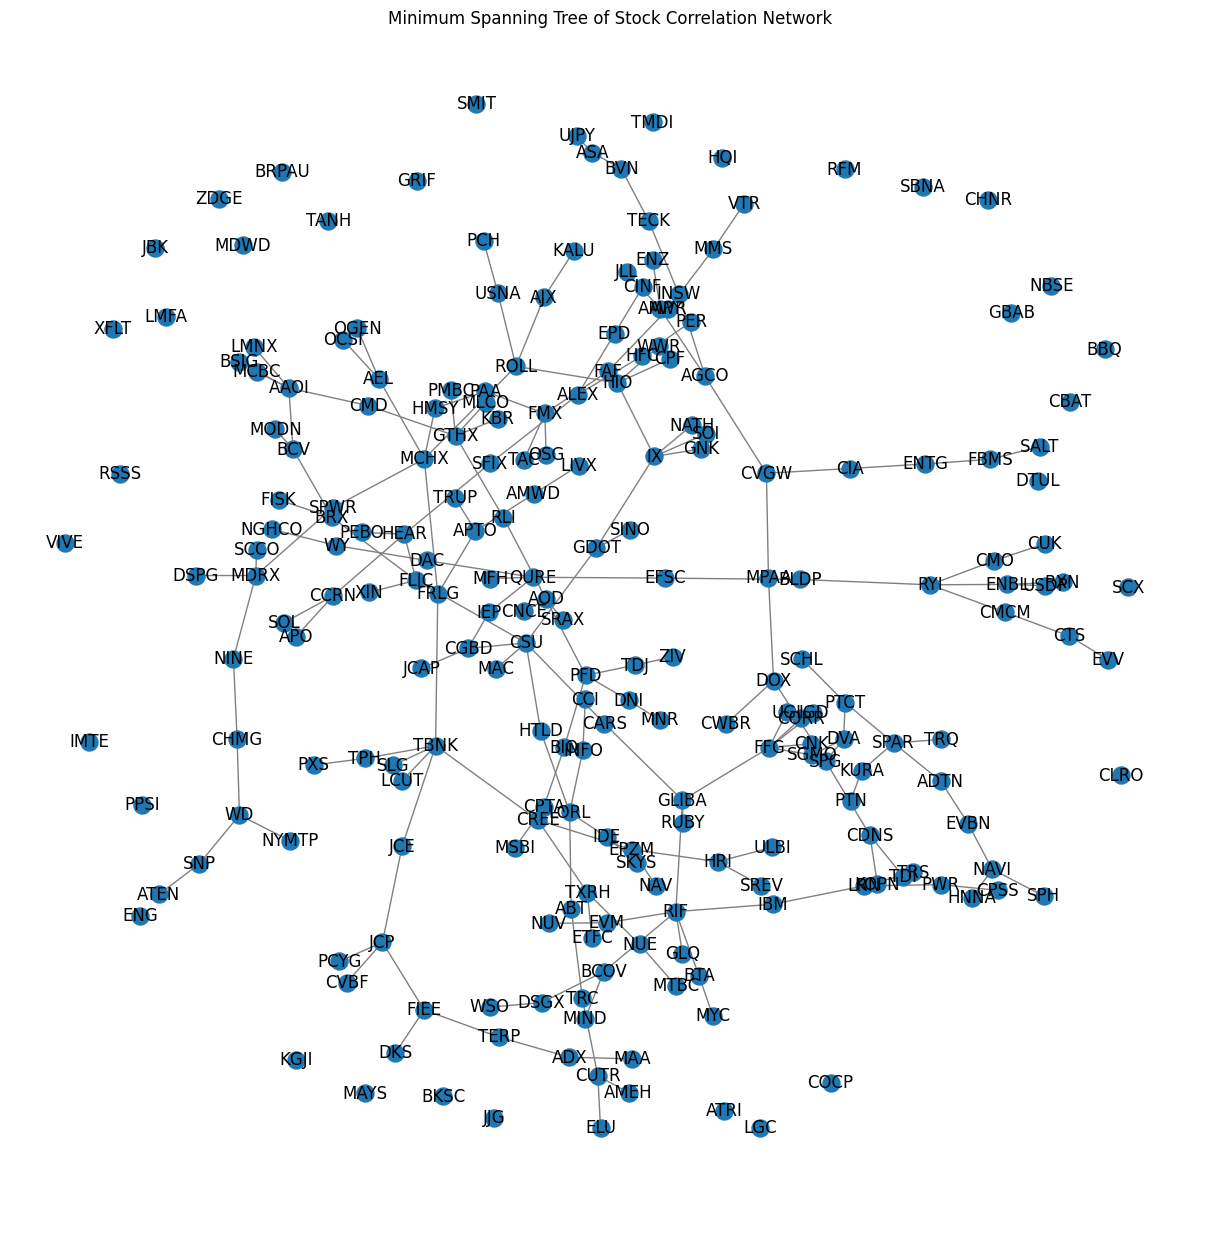

In [75]:
Aw = np.load("stock_item_adj_matrix_small_weighted.npy")
G = nx.from_numpy_array(Aw)
mst = nx.minimum_spanning_tree(G, weight='weight')

# Visualize MST
pos = nx.spring_layout(mst, seed=42)  # Spring layout gives a decent structure
plt.figure(figsize=(12, 12))
nx.draw(mst, pos, labels=labels, with_labels=True, edge_color='gray', node_size=150, font_size=12)

plt.title("Minimum Spanning Tree of Stock Correlation Network")
plt.show()

https://www.sciencedirect.com/science/article/abs/pii/S0167947304000258